<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {
      inlineMath: [['$','$'], ['\\(','\\)']],
      displayMath: [['$$','$$'], ['\\[','\\]']]
    },
    TeX: {
      extensions: ["color.js"]
    },
    "HTML-CSS": {
      availableFonts: ["TeX"],
      linebreaks: { automatic: true }
    }
  });
</script>

<script src="https://cdn.jsdelivr.net/npm/mathjax@2/MathJax.js?config=TeX-AMS-MML_HTMLorMML" type="text/javascript"></script>

<style>
@media all {
  body {
    font-weight: 700;
  }
  /* Rende le formule MathJax più spesse */
  .MathJax, .MathJax_Display {
    font-weight: bold; /* Aumenta lo spessore delle formule */
  }
  .bold-text {
    font-weight: bold;
  }
  .heavy-text {
    font-weight: 700;
  }
}
</style>

# <span style="color: red;">IRIS</span>
---
## Metadata

<span style="font-size: 14px;">

- A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.
- Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris)
- UCI_id: 53
- Year: 1936
- Number of Instances: 150
- Number of Attributes: 4
- Summary: This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.



    | Variable Name | Role    | Type         | Description                              | Units | Missing Values |
    |---------------|---------|--------------|------------------------------------------|-------|----------------|
    | sepal length        | Feature |Continuous  | sepal length                             |  cm    | no             |
    | sepal width         | Feature | Continuous  | sepal width                 |  cm   | no             |
    | petal length         | Feature | Continuous  | petal length                          |  cm    | no             |
    | petal width       | Feature | Continuous  | petal width    |   cm    | no             |
    | class         | Target  | Ordinal  | class of iris plant: Iris Setosa, Iris Versicolour, or Iris Virginica                       |      | no             |

</span>


---
## Data loading and preprocessing

No missing values in the dataset
Dropped 0 duplicates in the dataset


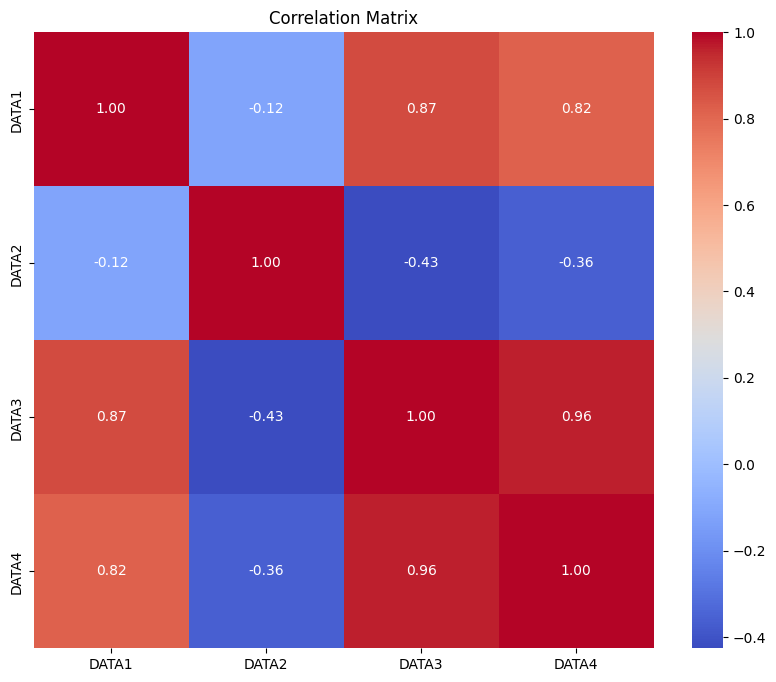

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

path = r"D:/UniBG/38091 Opt/Car Evaluation"
file_path = path + "/Data/Iris.csv"
full_df = pd.read_csv(file_path)

# Check for missing values
if full_df.isna().sum().sum() > 0:
    clean_df = full_df.dropna()
    print(f"Dropped {full_df.isna().sum().sum()} missing values in the dataset")
else:
    clean_df = full_df
    print("No missing values in the dataset")

# Check for duplicates
if clean_df.duplicated().sum() > 0:
    clean_df = clean_df.drop_duplicates()
    print(f"Dropped {clean_df.duplicated().sum()} duplicates in the dataset")
else:
    print("No duplicates in the dataset")

# Variables and target encoding
X_clean = clean_df.iloc[:, :-1]
Y_clean = clean_df.iloc[:, -1]

class_mapping = {1:0, 2:1, 3:2} #don't remove this line
Y_encoded = Y_clean.map(class_mapping)
X_encoded = X_clean
classes = np.unique(Y_encoded)
C = len(classes)  # Number of classes

if all(isinstance(v, int) for v in class_mapping.values()):
    # Class labels are integers
    class_names = [f"Class {label}" for label in classes]
else:
    # Class labels are strings
    inverse_class_mapping = {v: k for k, v in class_mapping.items()}
    class_names = [inverse_class_mapping[label] for label in classes]
feature_names = X_encoded.columns.tolist()

# Compute the correlation matrix
correlation_matrix = X_encoded.corr()

# Check if the correlation matrix is diagonal
epsilon = 1e-5 # Threshold for the correlation matrix
thresholded_matrix = np.where(np.abs(correlation_matrix) < epsilon, 0, correlation_matrix)
if np.array_equal(thresholded_matrix, np.diag(np.diag(thresholded_matrix))):
    print("Correlation Matrix is diagonal")

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


---

## Import the TPMSVM model

In [2]:
import import_ipynb
import TPMSVM as tpmsvm



---

## Fasten your seatbelts: Model in action!

### Start the engine....

<span style="font-size: 14px;">
We’re about to take off with the latest version of our model. <br>
Hold on tight as we initiate analizing the data and setting the hyperparamenters.

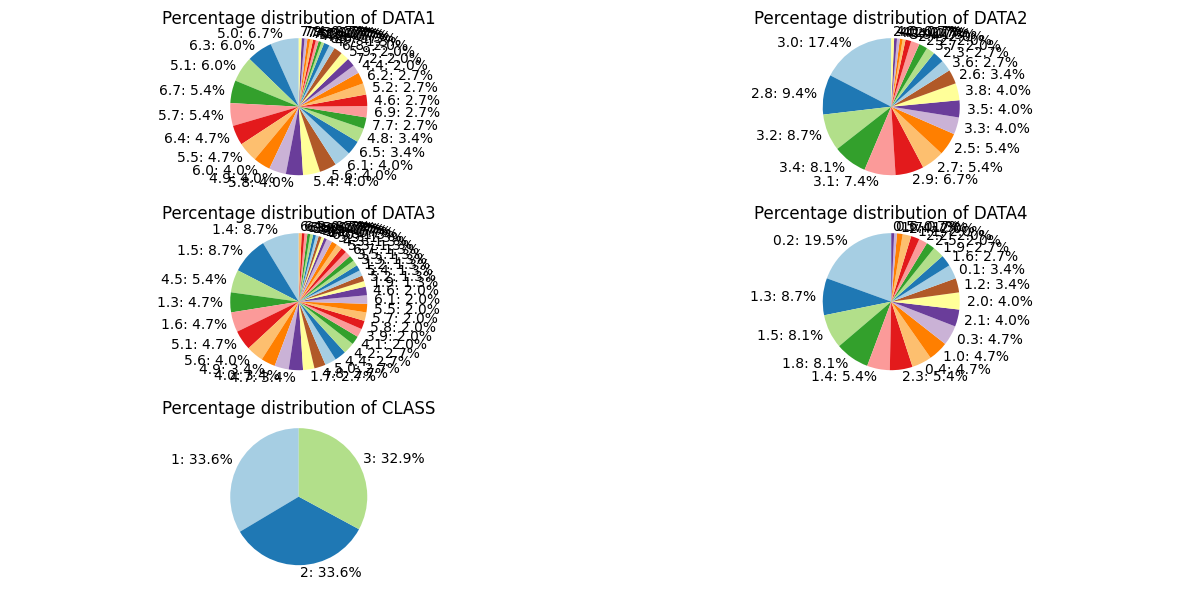

Value of DATA1: min = 4.3, max = 7.9
Value of DATA2: min = 2.0, max = 4.4
Value of DATA3: min = 1.0, max = 6.9
Value of DATA4: min = 0.1, max = 2.5


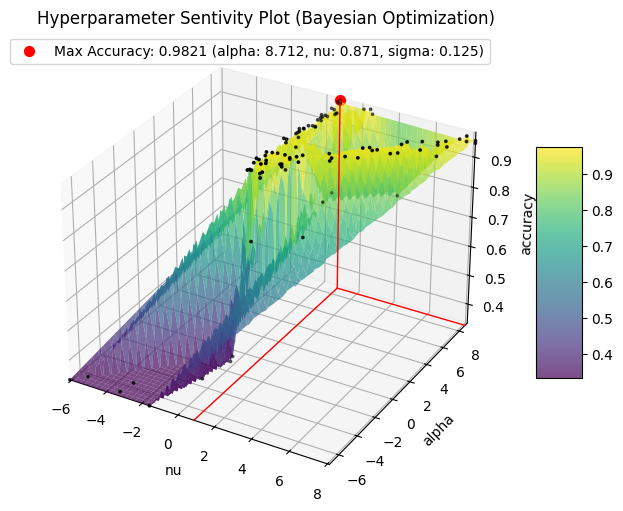

Pivot table of accuracy values and their counts:
    accuracy  count
0   0.982143      1
1   0.981812      1
2   0.973214      2
3   0.973214      4
4   0.972884      8
5   0.972553      1
6   0.964286      8
7   0.963955     10
8   0.963624      6
9   0.955357      4
10  0.955026      8
11  0.954696      4
12  0.954365      2
13  0.946429      1
14  0.946429      3
15  0.946098      9
16  0.945767      1
17  0.945437      3
18  0.945106      1
19  0.937169      1
20  0.936839      1
21  0.936508      1
22  0.935847      1
23  0.918981      2
24  0.918651      1
25  0.909722      1
26  0.901455      1
27  0.874339      1
28  0.722553      1
29  0.713955      1
30  0.713624      1
31  0.705357      1
32  0.686508      1
33  0.333333      8
34     Total    100
Features: 4 
Classes: [0 1 2] 
Dataset row: 149 
Dataset training row: 111 
Dataset validation row: 38


In [3]:
# Take a look at the data
tpmsvm.take_a_look(clean_df, X_encoded, Y_encoded)
myfile = f'{path}/Accuracy/Iris_bayesian2.csv'
tpmsvm.plot_hp_data(myfile,title=' (Bayesian Optimization)')
'''myfile = f'{path}/Accuracy/Iris_grid.csv'
tpmsvm.plot_hp_data(myfile)'''
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = tpmsvm.data_splitting(X_encoded, Y_encoded, classes)
# Optimize the hyper-parameters
best_alpha, best_nu, best_sigma = tpmsvm.optimize_hyper(
      classes, class_mapping, 
      X_train, Y_train, 
      default_alpha = 8.712,
      default_nu    = 0.871, 
      kernel_type = tpmsvm.rbf_kernel,
      default_sigma = 0.125,
      batch_required = 0.1, # None for full GD, 0..1 for %mini-batch, 1 for SGD, > 1 for mini-batch
      gamma_func = tpmsvm.gamma_naive, 
      tolerance = 100 * tpmsvm.machineEpsilon(), 
      T=500, 
      file_name="Iris_new", 
      method='none', 
      verbose=True)


### Go!


Class: 0
- Number of Eigenvalues for H: Positive = 0, Negative = 37, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Full Gradient Descent
- Batch size: 37
- gamma function: gamma_naive
- Initial gamma: 0.99524
- Optimization completed in 29 iterations
- Final gradient norm: 0.14449
- Support vectors found: 37
- R^2: 0.05544115704894083
- B  parameter: 6.082773787205272
- L  parameter: 1.0047782865768364
- mu parameter: 0.9952218011179051
- tolerance: 1.110e-14
- T (iterations): 29
- max error: 6.508537763104849e-61


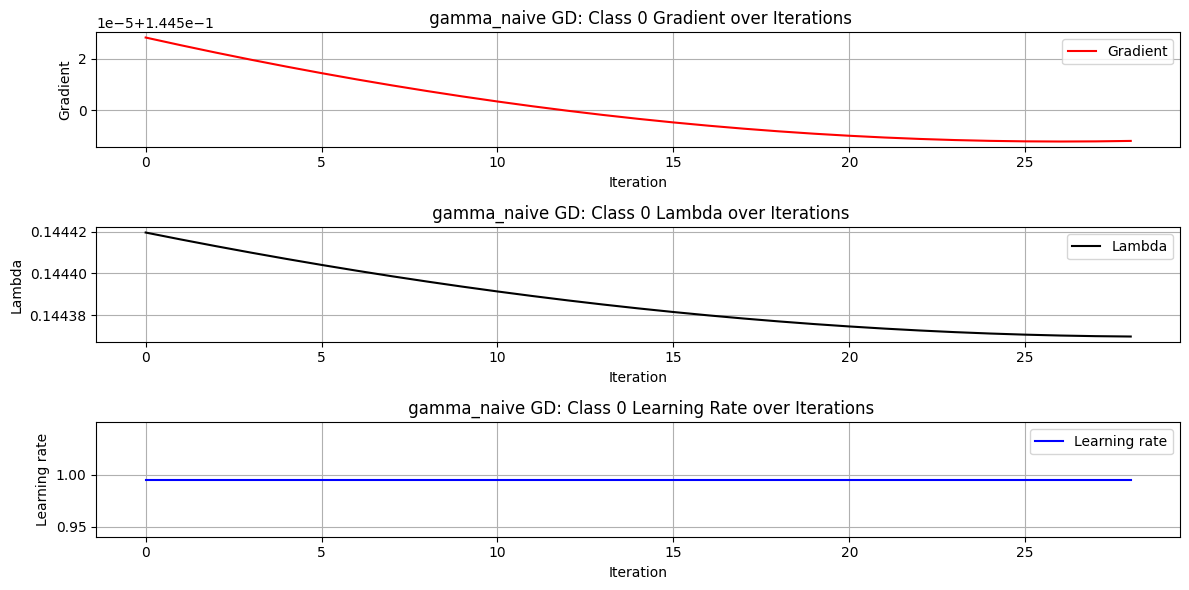


Class: 1
- Number of Eigenvalues for H: Positive = 0, Negative = 37, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Full Gradient Descent
- Batch size: 37
- gamma function: gamma_naive
- Initial gamma: 0.99996
- Optimization completed in 29 iterations
- Final gradient norm: 0.14443
- Support vectors found: 37
- R^2: 0.05544115704894083
- B  parameter: 6.082762531026631
- L  parameter: 1.0000384391024641
- mu parameter: 0.9999615609232272
- tolerance: 1.110e-14
- T (iterations): 29
- max error: 1.350903891080366e-121


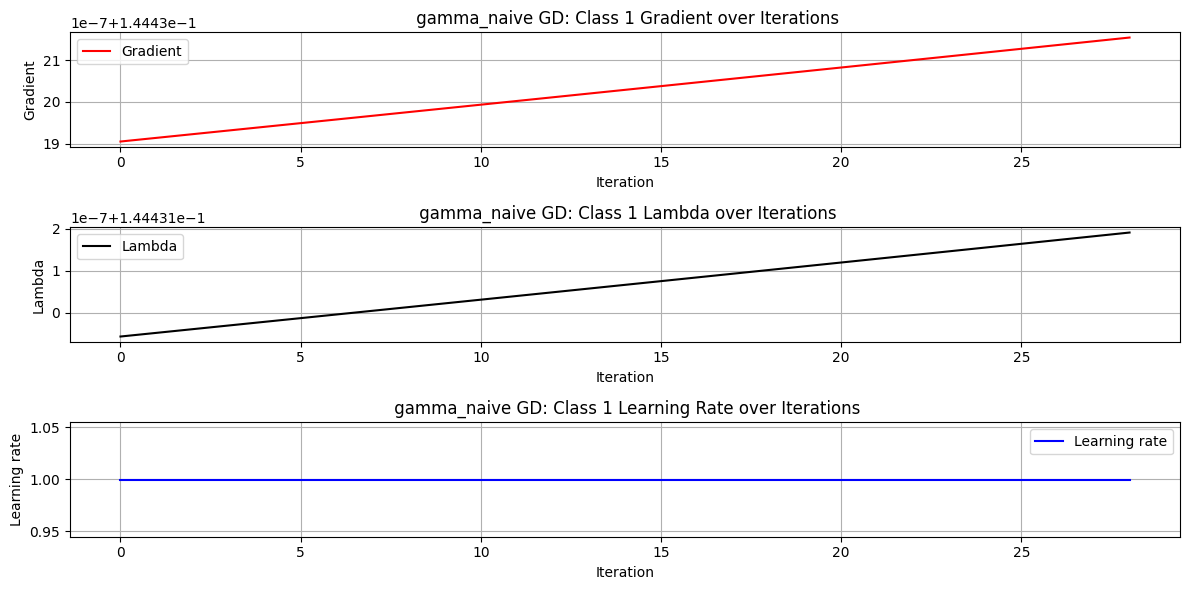


Class: 2
- Number of Eigenvalues for H: Positive = 0, Negative = 37, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Full Gradient Descent
- Batch size: 37
- gamma function: gamma_naive
- Initial gamma: 0.99994
- Optimization completed in 29 iterations
- Final gradient norm: 0.14443
- Support vectors found: 37
- R^2: 0.05544115704894083
- B  parameter: 6.08276253080059
- L  parameter: 1.0000552673686744
- mu parameter: 0.9999447326313258
- tolerance: 1.110e-14
- T (iterations): 29
- max error: 5.053531397523174e-117


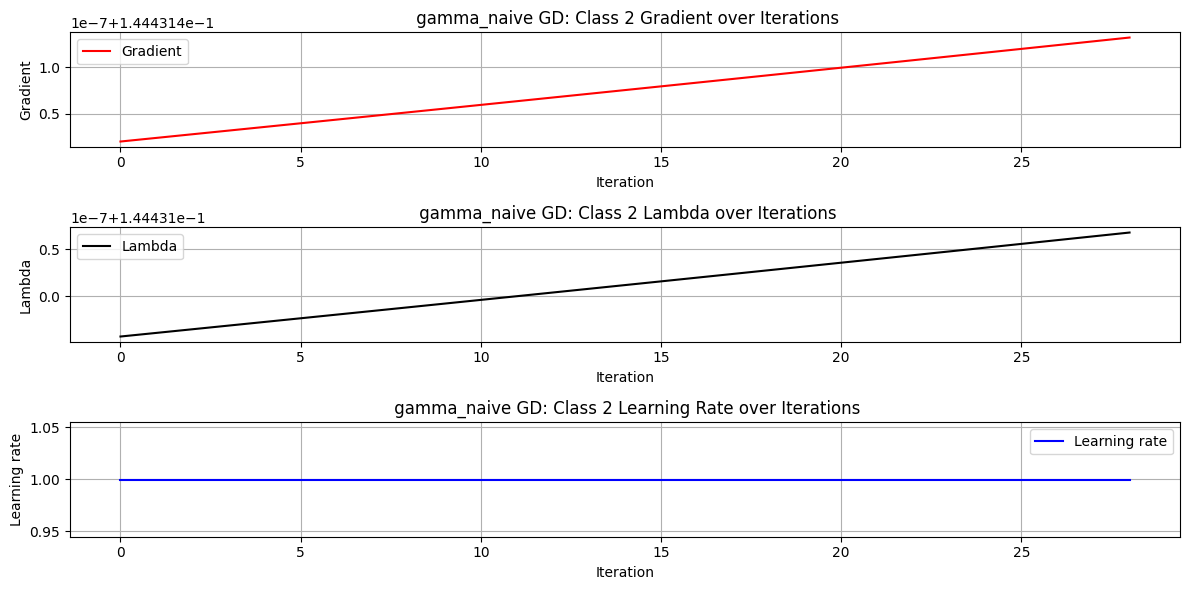


 --- Validation Results ---

Validation accuracy: 0.921 with alpha: 8.712, nu: 0.871 and param: 0.125

              precision    recall  f1-score    support
Class 0        1.000000  1.000000  1.000000  13.000000
Class 1        0.857143  0.923077  0.888889  13.000000
Class 2        0.909091  0.833333  0.869565  12.000000
accuracy       0.921053  0.921053  0.921053   0.921053
macro avg      0.922078  0.918803  0.919485  38.000000
weighted avg   0.922420  0.921053  0.920798  38.000000

 --- Optimization Results with CVXpy ---

Class: 0
- Support vectors found: 37
- Problem status: optimal

Class: 1
- Support vectors found: 37
- Problem status: optimal

Class: 2
- Support vectors found: 37
- Problem status: optimal

 --- Validation Results with CVXpy ---

Validation accuracy: 0.921 with alpha: 8.712, nu: 0.871 and param: 0.125

              precision    recall  f1-score    support
Class 0        1.000000  1.000000  1.000000  13.000000
Class 1        0.857143  0.923077  0.888889  13.0000

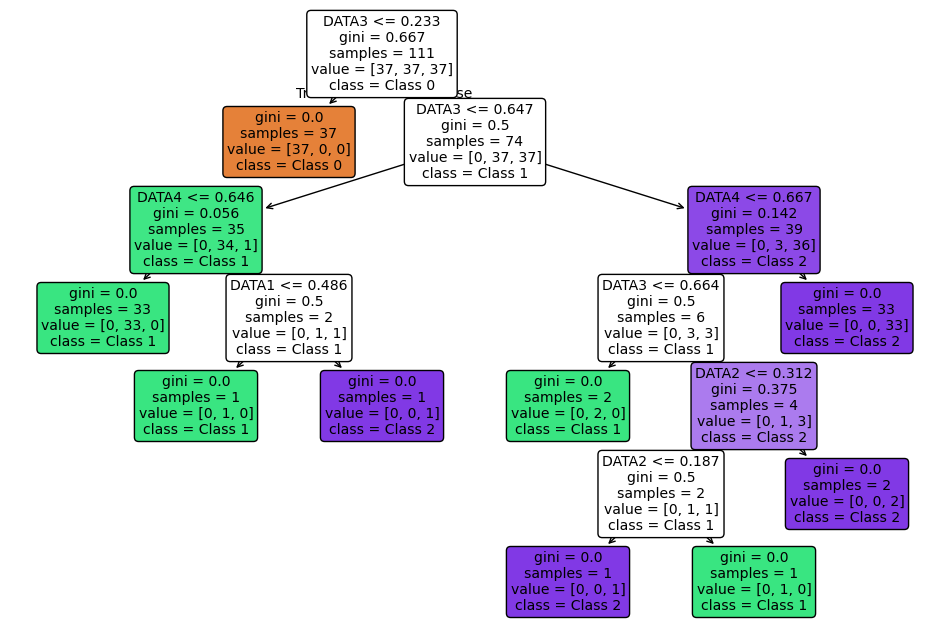


 --- Running Time ---

TPMSVM: 0.86 seconds
CVX: 0.10 seconds
SklearnSVM: 0.01 seconds
SklearnCART: 0.00 seconds


In [4]:
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Run the TPMSVM model
start_time = time.time()
accuracy, models = tpmsvm.TPMSVM(
      classes, class_mapping,
      X_train, Y_train, 
      X_val, Y_val,
      best_alpha, best_nu,
      kernel_type = tpmsvm.rbf_kernel, # Kernel type
      kernel_params = best_sigma, # Kernel parameters
      batch_required = None, # None for full GD, 0..1 for %mini-batch, 1 for SGD, > 1 for mini-batch
      gamma_func = tpmsvm.gamma_naive, # Gamma function
      tolerance = 100 * tpmsvm.machineEpsilon(), 
      T = 1000,
      verbose=True)
end_TPMSVM = time.time()
# Evaluate the models using CVX.py
tpmsvm.create_model(classes, class_mapping, X_val, Y_val, models)
end_CVX = time.time()
# Evaluate the models using sklearnSVM
tpmsvm.use_sklearnSVM(X_train, Y_train, X_val, Y_val)
end_sklearnSVM = time.time()
# Evaluate the models using sklearnCART
cart_model = tpmsvm.use_sklearnCART(X_train, Y_train, X_val, Y_val)
end_sklearnCART = time.time()
plt.figure(figsize=(12,8))
plot_tree(cart_model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()

# Print the time taken for each method
print(f"\n --- Running Time ---\n")
print(f"TPMSVM: {end_TPMSVM - start_time:.2f} seconds")
print(f"CVX: {end_CVX - end_TPMSVM:.2f} seconds")
print(f"SklearnSVM: {end_sklearnSVM - end_CVX:.2f} seconds")
print(f"SklearnCART: {end_sklearnCART - end_sklearnSVM:.2f} seconds")

---
<span style="font-size: 12px;">

- Accuracy: The proportion of correct predictions relative to the total predictions.<br>
- Precision: The proportion of true positives relative to the total predicted positives. It indicates how reliable the positive predictions are.<br>
- Recall: The proportion of true positives relative to the total actual positives. It indicates how well the model finds the positives.<br>
- F1 Score: The harmonic mean of precision and recall. It is useful when there is an imbalance between classes.<br>